# 652 Week 1 Tips and Tricks #

Jamie White 

Revision: [ F2021 23 Aug 2021 ]

## Before starting your assignments... ##

... make a clean copy of your notebook in case you have to start over.

In Coursera:

`File > Make a copy...`

## Don't overload the autograder ###

Some cells take quite a while to compute. Work on one problem at a time, comment out other cells until you're read to submit.  Make sure your notebook runs, however.

```
Kernel -> Restart & Run All

```

## Load some libraries to get started... ##

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Make a graph (from 652 W1 tutorial) ###

In [8]:
G = nx.Graph()
G.add_node(1) # add a single node
G.add_nodes_from([2, 3, 4, 5, 6, 7, 8, 9, 0]) # add a list of nodes

In [20]:
G.add_edge(1, 2) # add a single edge
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3,5), 
                  (3, 7), (4,8), (5,9),(5,0),(6,0),(7,8),(8,9)]) 
# G.remove_edge(1, 2)

### User `dir` to find methods and attributes of any function ###

Maxim: When in doubt, `dir`

In [21]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

### Reminder: NetworkX methods vs attributes ###

In [22]:
# method
nx.degree_centrality(G)
# not G.degree_centrality

{1: 0.2222222222222222,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.2222222222222222,
 5: 0.4444444444444444,
 6: 0.1111111111111111,
 7: 0.2222222222222222,
 8: 0.3333333333333333,
 9: 0.2222222222222222,
 0: 0.2222222222222222}

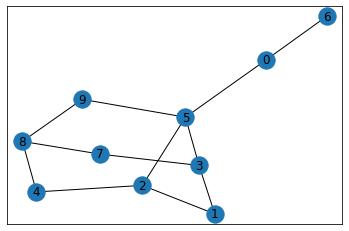

In [23]:
# method
nx.draw_networkx(G)

In [24]:
# attibute
G.edges

EdgeView([(1, 3), (1, 2), (2, 4), (2, 5), (3, 5), (3, 7), (4, 8), (5, 9), (5, 0), (6, 0), (7, 8), (8, 9)])

___

## Graph analysis and sorting of dictionary values ###

Many functions return dictionaries. The 652 Assignments often require sorting of dictionary items based on value.

☞ Different sorting methods are equally valid, but ties may be resolved differently depending on method. **The autograder is very particular about exact answers, so use the recommended hint.**


>Hint: you can sort a dictionary `D` by its values using 
>
>```python
>sorted(D.items(), key=lambda item: item[1])
>```

In [27]:
D = nx.degree_centrality(G)
D

{1: 0.2222222222222222,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.2222222222222222,
 5: 0.4444444444444444,
 6: 0.1111111111111111,
 7: 0.2222222222222222,
 8: 0.3333333333333333,
 9: 0.2222222222222222,
 0: 0.2222222222222222}

### Do this... ###

In [88]:
D_sorted = sorted(D.items(), key=lambda item: item[1])
D_sorted

[(6, 0.1111111111111111),
 (1, 0.2222222222222222),
 (4, 0.2222222222222222),
 (7, 0.2222222222222222),
 (9, 0.2222222222222222),
 (0, 0.2222222222222222),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333),
 (5, 0.4444444444444444)]

In [89]:
# recall: reverse slicing of lists
N    = 5
topN = D_sorted[::-1][:N]
topN

[(5, 0.4444444444444444),
 (8, 0.3333333333333333),
 (3, 0.3333333333333333),
 (2, 0.3333333333333333),
 (0, 0.2222222222222222)]

In [96]:
topN_nodes = [n for n,dc in topN]
topN_nodes

[5, 8, 3, 2, 0]

### ...don't do this... ###

In [93]:
D_sorted_rev = sorted(D.items(), key=lambda item: item[1], reverse=True)
D_sorted_rev

[(5, 0.4444444444444444),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333),
 (1, 0.2222222222222222),
 (4, 0.2222222222222222),
 (7, 0.2222222222222222),
 (9, 0.2222222222222222),
 (0, 0.2222222222222222),
 (6, 0.1111111111111111)]

In [127]:
N = 5
topN_nodes_rev = [n for n,dc in D_sorted_rev][:N]
topN_nodes_rev

[5, 2, 3, 8, 1]

### ...because ###

In [99]:
set(topN_nodes) == set(topN_nodes_rev)

False

### ...and don't do this, either... ###

In [107]:
D_sorted_alt1 = sorted([(v,k) for k,v in D.items()])
D_sorted_alt1

[(0.1111111111111111, 6),
 (0.2222222222222222, 0),
 (0.2222222222222222, 1),
 (0.2222222222222222, 4),
 (0.2222222222222222, 7),
 (0.2222222222222222, 9),
 (0.3333333333333333, 2),
 (0.3333333333333333, 3),
 (0.3333333333333333, 8),
 (0.4444444444444444, 5)]

In [128]:
N               = 5
N_slice         = N-1
topN_alt1       = D_sorted_alt1[:N_slice:-1]
topN_alt1

[(0.4444444444444444, 5),
 (0.3333333333333333, 8),
 (0.3333333333333333, 3),
 (0.3333333333333333, 2),
 (0.2222222222222222, 9)]

In [129]:
topN_nodes_alt1 = [n for dc,n in topN_alt1]
topN_nodes_alt1

[5, 8, 3, 2, 9]

### ...because ###

In [114]:
# both sorts are valid, but ties are different
set(topN_nodes) == set(topN_nodes_alt1)

False

### More Do's ###

In [120]:
D_max_value = D_sorted[-1]
D_max_value

(5, 0.4444444444444444)

In [121]:
# value (degree centrality in this case)
D_max_value[1]

0.4444444444444444

In [133]:
# node with max value
D_max_value[0]

5

In [139]:
D_max_alt1 = max(D_sorted_alt1)
D_max_alt1

(0.4444444444444444, 5)

In [140]:
D_max_value_alt1 = D_max_alt1[0]

___

## Random seeds  ##

### `random()`, not `np.random()` ###

Be sure to set your random seed.

Not all randoms are random.  Use the bultin python `random()`, not `np.random()`

The autograder is very sensitive to how random() is used, so if you are having issues, check the instructions and pay attention to `random()`.

In [132]:
import random # if you see this, it is a hint about what to use.

___
## Save computationally intensive results ##

Some computations, such as PageRank, can take quite a while to run. Once you run them once, you can save the files to make your notebook run more quickly.

`json` files are a good choice for saving dictionaries.

Note that this is not a requirement, but just a suggestion to make your notebook run faster. 

In [209]:
!rm my_pagerank.json
saved_pr = None

In [210]:
pr_file = 'my_pagerank.json'

try:
    with open(pr_file, 'r') as f:
        saved_pr = json.load(f)
except:
    
    print("can't find file: ",pr_file)
    print()
    print("recalculating pagerank")
    print()
    my_pr = nx.pagerank(G)
    
    with open(pr_file, 'w') as f:
        json.dump(my_pr, f)

my_pr

can't find file:  my_pagerank.json

recalculating pagerank



{1: 0.08238301608879246,
 2: 0.11891246549898707,
 3: 0.11891246549898707,
 4: 0.08287983163527103,
 5: 0.15846945385063035,
 6: 0.05586956767829658,
 7: 0.08287983163527103,
 8: 0.12066530400065731,
 9: 0.08286340613976471,
 0: 0.09616465797334213}

In [212]:
print(saved_pr)

None


In [219]:
my_pr = None

try:
    with open(pr_file, 'r') as f:
        saved_pr = json.load(f)
except:
    print("can't find file: ", pr_file)
    
saved_pr

{'1': 0.08238301608879246,
 '2': 0.11891246549898707,
 '3': 0.11891246549898707,
 '4': 0.08287983163527103,
 '5': 0.15846945385063035,
 '6': 0.05586956767829658,
 '7': 0.08287983163527103,
 '8': 0.12066530400065731,
 '9': 0.08286340613976471,
 '0': 0.09616465797334213}

In [220]:
type(saved_pr)

dict

In [221]:
print(my_pr)

None


In [222]:
my_pr = saved_pr

In [223]:
my_pr

{'1': 0.08238301608879246,
 '2': 0.11891246549898707,
 '3': 0.11891246549898707,
 '4': 0.08287983163527103,
 '5': 0.15846945385063035,
 '6': 0.05586956767829658,
 '7': 0.08287983163527103,
 '8': 0.12066530400065731,
 '9': 0.08286340613976471,
 '0': 0.09616465797334213}

In [224]:
type(my_pr)

dict

## Which connectedness measures to use as features in a machine learning model? ##

**Hint:** as many as you need to in order to attain an F1 score high enough to pass the autograder. As far as I can tell, you will need to use more than one.